In [2]:
pwd

'/mmfs1/data/aglinska/BC-fMRI-AE/Notebooks'

In [33]:
import os
import pandas
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import pickle

In [36]:
df = pd.read_csv('../Data/ABIDE_df2.csv')
df = df.iloc[~pd.isna(df['bids_folder']).values]
df = df.sort_values(by='bids_folder')
patients = df['DX_GROUP'].values==1
print(len(df))
df.head(3)

1048


,participant_id,DX_GROUP,DSM_IV_TR,AGE_AT_SCAN,SEX,HANDEDNESS_CATEGORY,HANDEDNESS_SCORES,FIQ,VIQ,PIQ,...,WISC_IV_MATRIX_SCALED,WISC_IV_DIGIT_SPAN_SCALED,WISC_IV_LET_NUM_SCALED,WISC_IV_CODING_SCALED,WISC_IV_SYM_SCALED,EYE_STATUS_AT_SCAN,AGE_AT_MPRAGE,BMI,bids_folder,site
460,50642,1,1.0,33.0,1,R,NaN,103.0,98.0,107.0,...,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,sub-CMUa0050642,1
464,50646,1,1.0,21.0,1,R,NaN,108.0,100.0,115.0,...,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,sub-CMUa0050646,1
465,50647,1,1.0,27.0,1,R,NaN,104.0,97.0,109.0,...,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,sub-CMUa0050647,1


In [37]:
analysis_name = 'CVAE_2021-10-27 11:41:44.052073'
latent_fn = os.path.join('../Data',f'cmat_latents_{analysis_name}.pickle')
latent_data = pickle.load(open(latent_fn,'rb'))
data = latent_data
print(analysis_name)

CVAE_2021-10-27 11:41:44.052073


In [30]:
keys = list(latent_data.keys())
for key in keys:
    #print(f'{key} {latent_data[key].shape}')
    print(key+f'{latent_data[key].shape}'.rjust(30-len(key)))

Z_mu                (1048, 16)
Z_sigma             (1048, 16)
Z                   (1048, 16)
S_mu                (1048, 16)
S_sigma             (1048, 16)
S                   (1048, 16)
z_samples      (100, 1048, 16)
s_samples      (100, 1048, 16)
z_embedding           (514, 2)
s_embedding           (514, 2)
predicted       (1048, 51, 51)
predicted_bg    (1048, 51, 51)


In [ ]:
import umap
reducer = umap.UMAP(n_components=2)

umap_bg_all = reducer.fit_transform(data['Z'])
umap_sl_all = reducer.fit_transform(data['S'])

umap_bg_asd = reducer.fit_transform(data['Z'][patients,:])
umap_sl_asd = reducer.fit_transform(data['S'][patients,:])

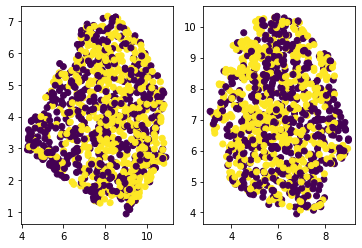

In [43]:
plt.subplot(2,2,1)
plt.scatter(umap_bg_all[:,0],umap_bg_all[:,1],c=df['DX_GROUP'].values)
plt.subplot(2,2,2)
plt.scatter(umap_sl_all[:,0],umap_sl_all[:,1],c=df['DX_GROUP'].values)

plt.subplot(2,2,3)
plt.scatter(umap_bg_all[:,0],umap_bg_all[:,1],c=df['DX_GROUP'].values)
plt.subplot(2,2,4)
plt.scatter(umap_sl_all[:,0],umap_sl_all[:,1],c=df['DX_GROUP'].values)